In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/home/elton/Documents/DataTrained_Projects/Flight Price Prediction/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')

In [3]:
# First 5 rows
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
tf = pd.read_excel('/home/elton/Documents/DataTrained_Projects/Flight Price Prediction/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Test_set.xlsx')

In [5]:
tf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
# Last 5 rows
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
# Size of df
df.size

117513

In [8]:
# rows*cols in df
df.shape

(10683, 11)

In [9]:
# Base information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
# Unique values and val counts in all columns
for column in df.columns:
        print(str(column)+" : " +str(df[column].unique()))
        print(df[column].value_counts())

Airline : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Date_of_Journey : ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/

In [11]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

<AxesSubplot:xlabel='Airline'>

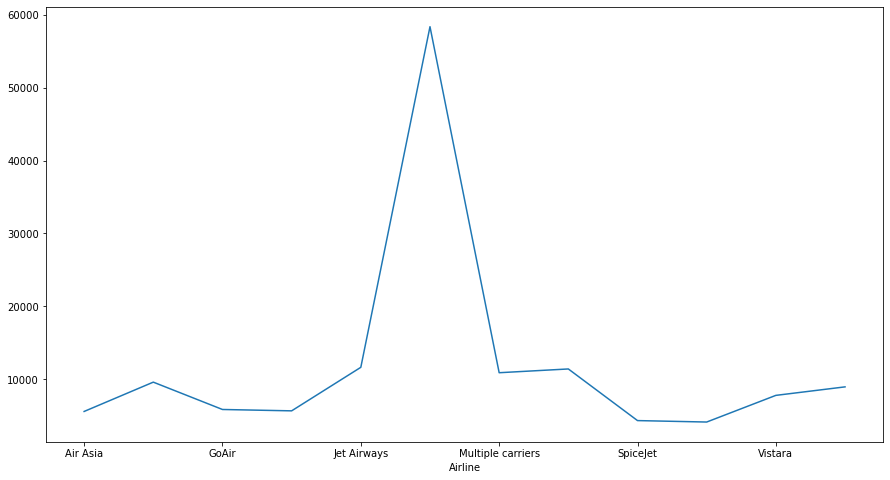

In [12]:
# Distribution of Airline vs Price
D=df.groupby('Airline').mean()
plt.figure(figsize=(15,8))
D['Price'].plot()

 - Some airlines are more expensive

In [13]:
# <<<<<<<<<< Need to use encoder to encode non-numerical features to numerical features >>>>>>>>>>>>>
for col in df.columns:
    if df[col].dtypes=='object':
        encoder=LabelEncoder()
        df[col]=encoder.fit_transform(df[col])

In [14]:
# Done that for test data also 
for col in tf.columns:
    if tf[col].dtypes=='object':
        encoder=LabelEncoder()
        tf[col]=encoder.fit_transform(tf[col])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int64
 1   Date_of_Journey  10683 non-null  int64
 2   Source           10683 non-null  int64
 3   Destination      10683 non-null  int64
 4   Route            10683 non-null  int64
 5   Dep_Time         10683 non-null  int64
 6   Arrival_Time     10683 non-null  int64
 7   Duration         10683 non-null  int64
 8   Total_Stops      10683 non-null  int64
 9   Additional_Info  10683 non-null  int64
 10  Price            10683 non-null  int64
dtypes: int64(11)
memory usage: 918.2 KB


In [16]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          2671 non-null   int64
 1   Date_of_Journey  2671 non-null   int64
 2   Source           2671 non-null   int64
 3   Destination      2671 non-null   int64
 4   Route            2671 non-null   int64
 5   Dep_Time         2671 non-null   int64
 6   Arrival_Time     2671 non-null   int64
 7   Duration         2671 non-null   int64
 8   Total_Stops      2671 non-null   int64
 9   Additional_Info  2671 non-null   int64
dtypes: int64(10)
memory usage: 208.8 KB


<AxesSubplot:xlabel='Airline'>

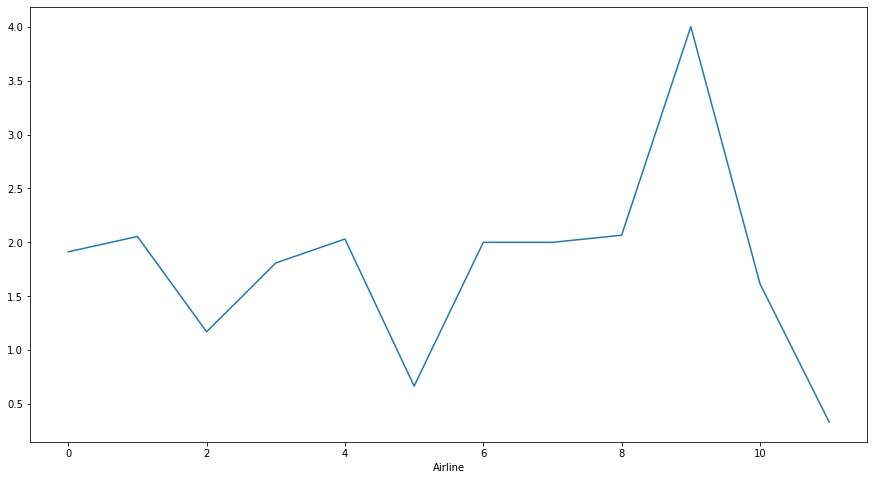

In [17]:
# Distribution of Airline vs Source to check if we have bias due to location
D=df.groupby('Airline').mean()
plt.figure(figsize=(15,8))
D['Source'].plot()

- We can see that some that there is some bias due to availability.</ul>
<br>This can mean that:
 - Either airlines are pperforming better in certain places
 - Distribution of airlines is not uniform and is not available in certain locations etc.

<AxesSubplot:xlabel='Total_Stops'>

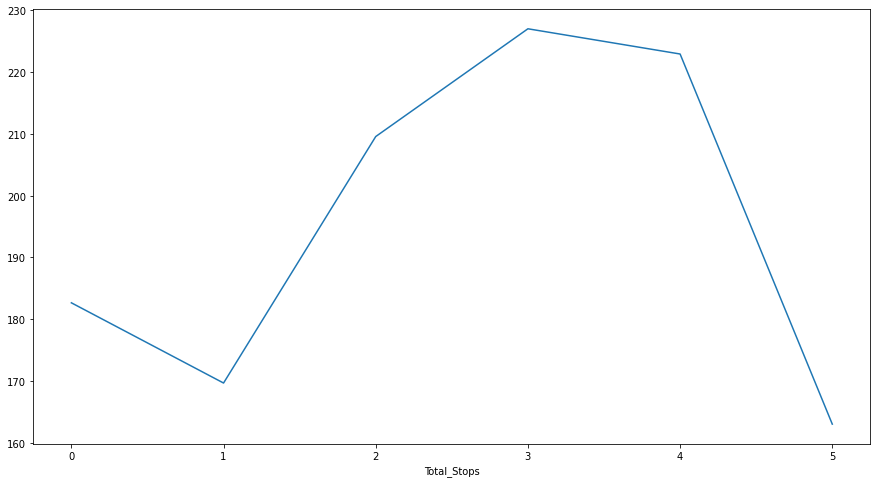

In [18]:
# Distribution of Duration vs Total Stops
D=df.groupby('Total_Stops').mean()
plt.figure(figsize=(15,8))
D['Duration'].plot()

 - We can see relation between duration and total stops.
 - Decrease fron Total_stops 4 and 5 is due to refuelling 

In [19]:
# Checking null values
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [20]:
tf.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [21]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,74.825143,107.980717,869.828419,194.069269,1.458579,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,36.730924,61.085563,331.509504,108.620556,1.806560,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,128.000000,221.000000,1342.000000,367.000000,5.000000,9.000000,79512.000000


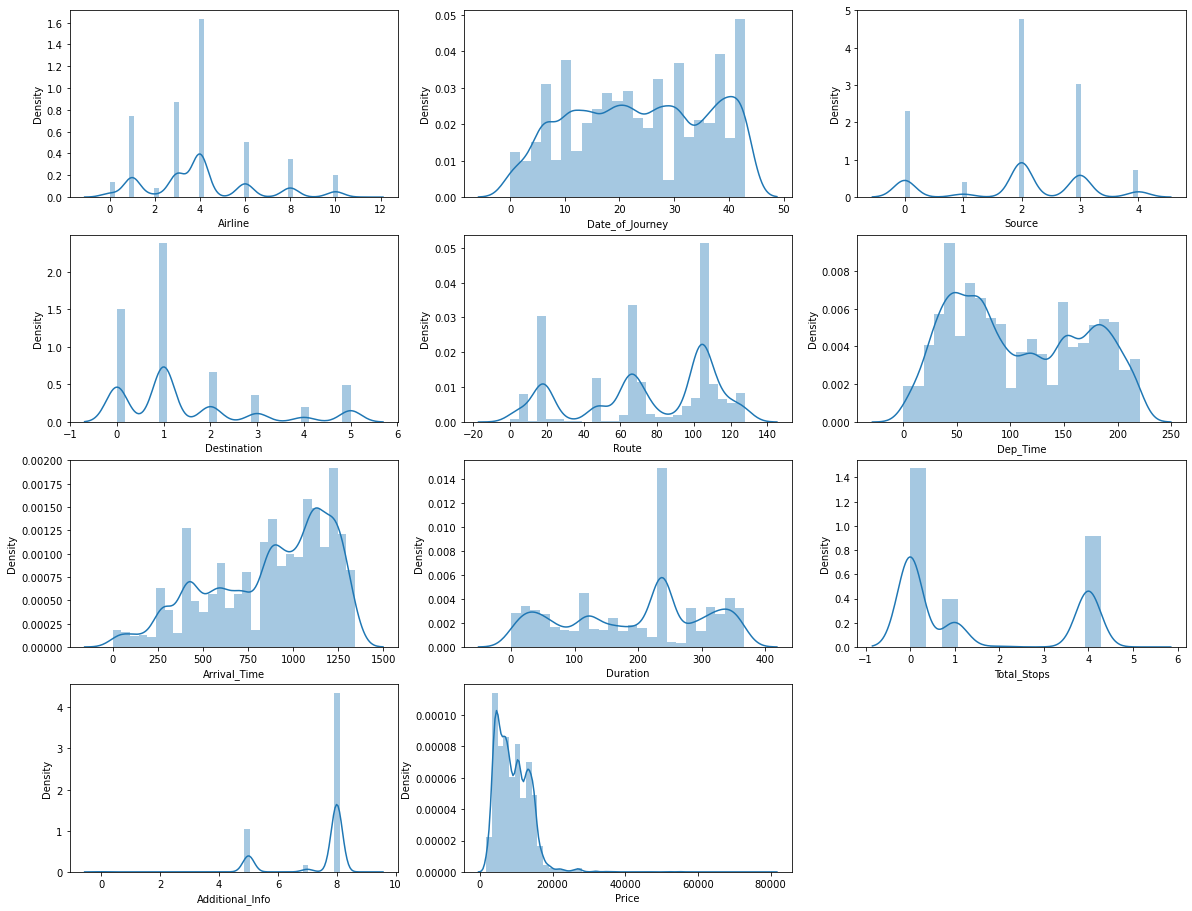

In [22]:
#Distribution of the df
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

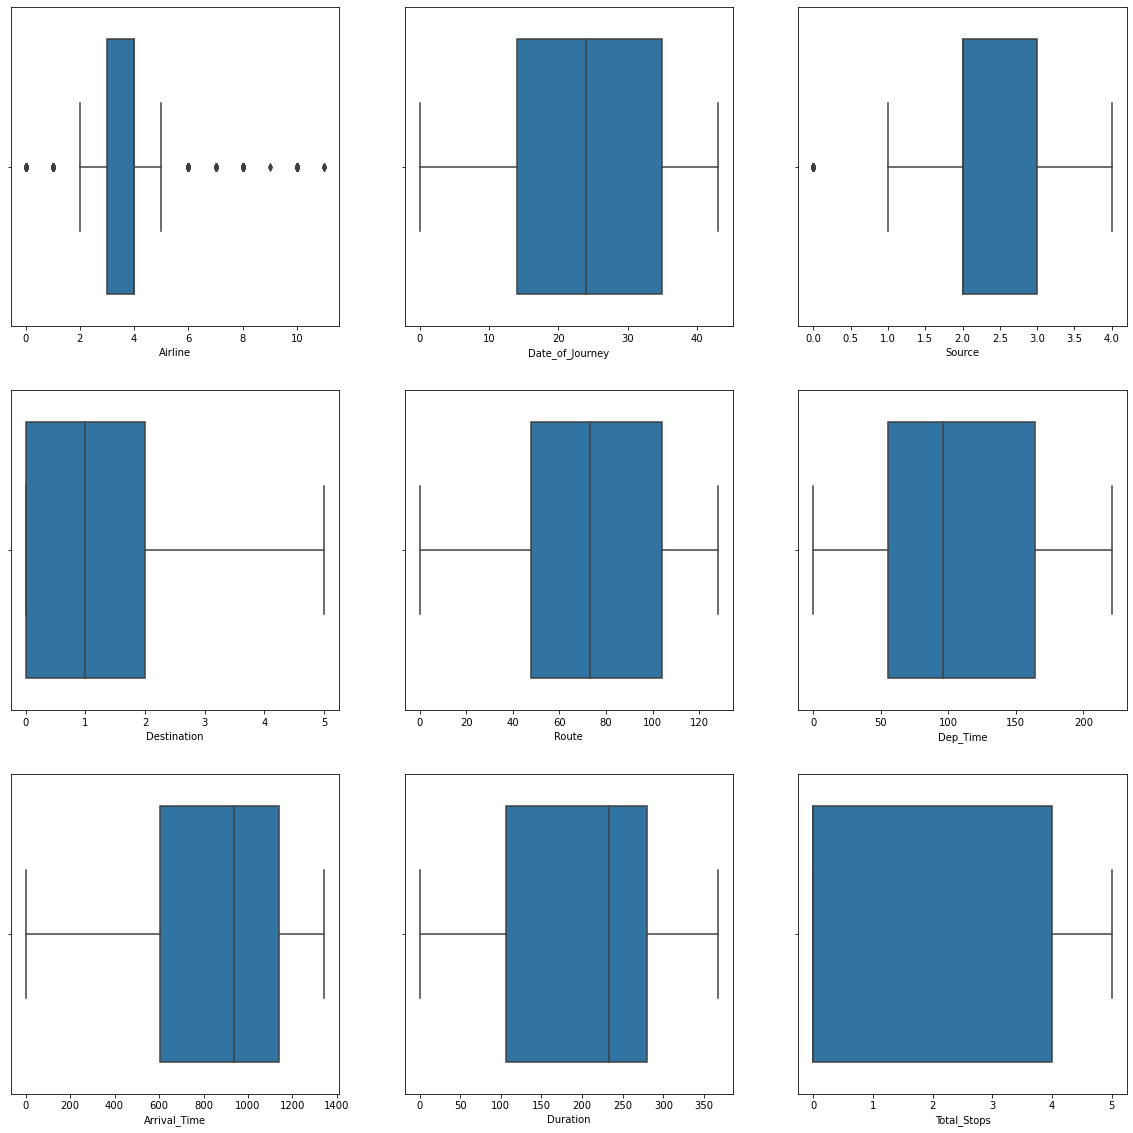

In [23]:
# Detecting Outliers
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

In [24]:
#Removing outliers using zscore
z=np.abs(stats.zscore(df))
np.where(z>3)

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
          826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
         1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
         2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
         2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
         3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
         4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
         5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
         6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
         7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
         8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
         8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
         9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
        10383, 10439, 10511, 10511]),
 array([10, 10, 10, 10, 10, 10, 10,  9,

In [25]:
df.shape

(10683, 11)

In [26]:
# Dropping rows where z>3
index=(np.where(z>3)[0])
df=df.drop(df.index[index])

In [27]:
df.shape

(10578, 11)

 - 10683-10578 = 105 rows dropped || (105*100)/10683 = 0.982% data loss

In [28]:
# Skew values before treatment
df.skew()

Airline            0.731709
Date_of_Journey   -0.061918
Source            -0.439204
Destination        1.269454
Route             -0.511208
Dep_Time           0.194141
Arrival_Time      -0.608273
Duration          -0.216095
Total_Stops        0.617901
Additional_Info   -1.533587
Price              0.411094
dtype: float64

In [29]:
# separating labels and data to predict primary fuel
x=df.drop(columns=['Price'],axis=1)
y=df['Price']

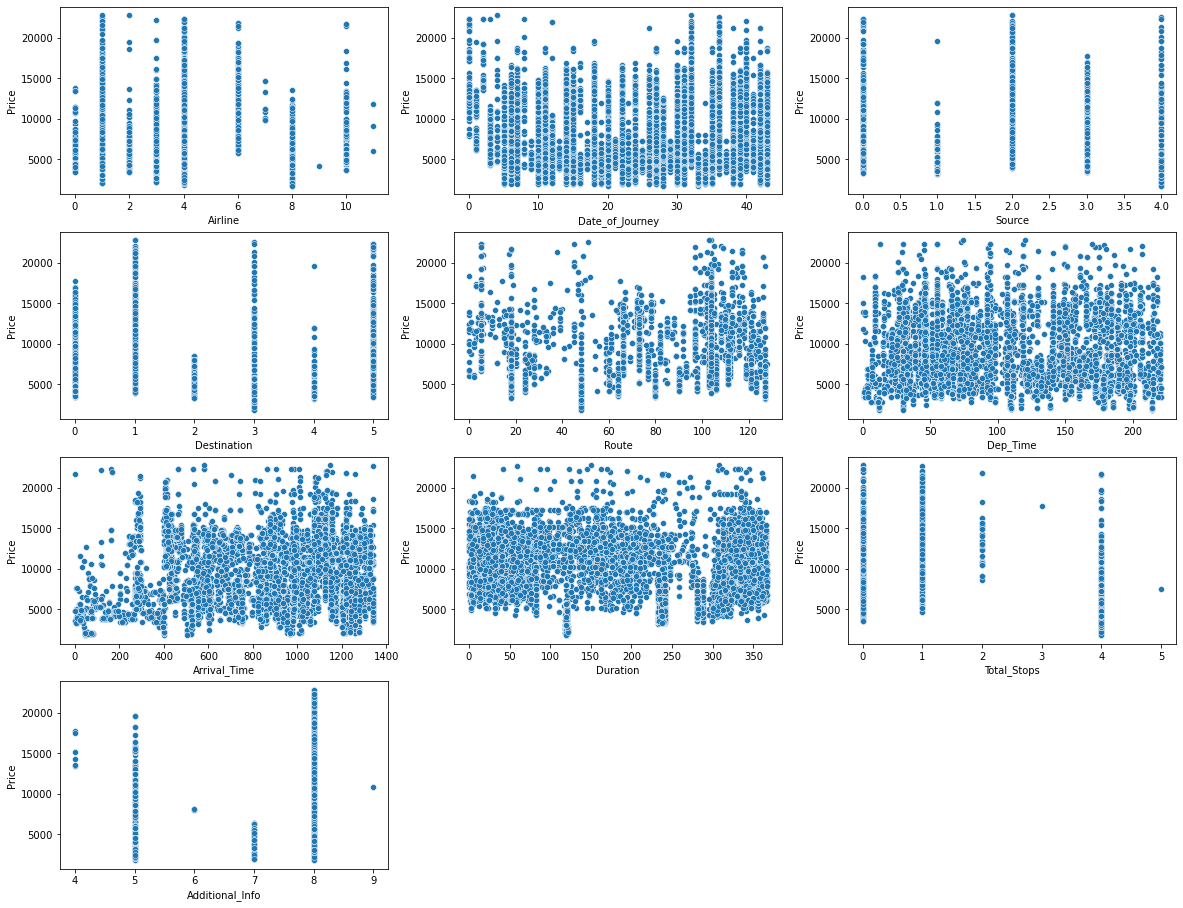

In [30]:
# Relation between features and labels using Scatter plot
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.scatterplot(x[column],y)
    plotnumber+=1

In [31]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_new = power.fit_transform(x)

In [32]:
# Skew values after treatment
data_new=pd.DataFrame(data_new,columns=x.columns)
data_new.skew()

Airline           -0.015590
Date_of_Journey   -0.214275
Source            -0.234422
Destination        0.040863
Route             -0.437248
Dep_Time          -0.150696
Arrival_Time      -0.382489
Duration          -0.391174
Total_Stops        0.316792
Additional_Info   -1.363711
dtype: float64

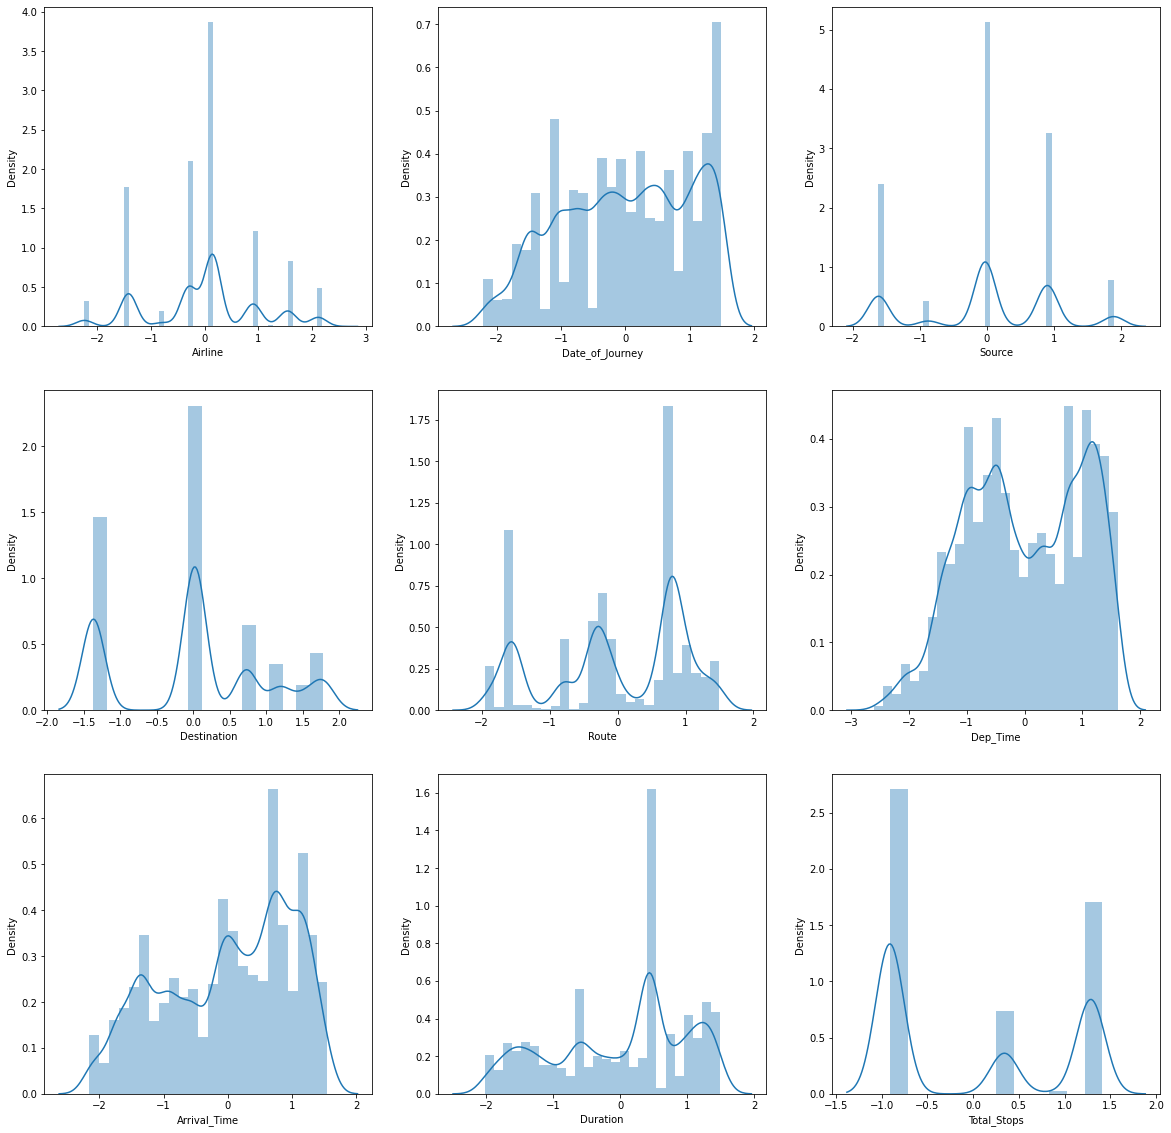

In [33]:
# Distibution after fixing skew and outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_new:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_new[i])
        plt.xlabel(i)
    plotnumber+=1

In [34]:
x = data_new

# Model

In [35]:
import GPUtil
GPUtil.showUtilization()

| ID | GPU | MEM |
------------------
|  0 | 14% |  3% |


In [36]:
# Finding best random state
min_squared_error = 0
max_random_state = 1
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    model=XGBRegressor(tree_method='gpu_hist', gpu_id=0)
    model.fit(X_train,y_train)
    pred= model.predict(X_test)
    root_mean_squared_error=np.sqrt(mean_squared_error(y_test,pred))
    if root_mean_squared_error<min_squared_error:
        min_squared_error=root_mean_squared_error
        max_random_state=i
        
print('lowest error is: ',min_squared_error,' on random_state ',max_random_state)

lowest error is:  0  on random_state  1


In [37]:
# List of regressors and scorers

en = ElasticNet()
lr = LogisticRegression(random_state = 1)
dtr = DecisionTreeRegressor(random_state=1)
rfr = RandomForestRegressor(random_state=1)
ar = AdaBoostRegressor(random_state=1)
gbr= GradientBoostingRegressor(random_state=1)
sr = SVR()
lgr=LGBMRegressor(random_state=1)
xgbr = XGBRegressor(tree_method='gpu_hist', gpu_id=0, random_state = 1)

m_list= [en,lr,dtr,rfr,ar,gbr,sr,lgr,xgbr]

s=SCORERS
s.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [38]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [74]:
# Training models and getting CV score
for m in m_list:
    m.fit(X_train,y_train)
    preds = m.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test,preds))
    print(m)
    print('Root_mean_squared_error: ',rmse)
    print('cross validation scores below:--  \n',m)
    print('root_mean_squared_error: ',cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('\n')
    print('\n')

ElasticNet()
Root_mean_squared_error:  3530.2570816560587
cross validation scores below:--  
 ElasticNet()
root_mean_squared_error:  -3463.315779877851
difference between model score and cross validation score:  -66.94130177820762




LogisticRegression(random_state=1)
Root_mean_squared_error:  3096.554559854389
cross validation scores below:--  
 LogisticRegression(random_state=1)
root_mean_squared_error:  -3071.22500879696
difference between model score and cross validation score:  -25.329551057428944




DecisionTreeRegressor(random_state=1)
Root_mean_squared_error:  1549.9787220321327
cross validation scores below:--  
 DecisionTreeRegressor(random_state=1)
root_mean_squared_error:  -1610.6425830781197
difference between model score and cross validation score:  60.663861045987005




RandomForestRegressor(random_state=1)
Root_mean_squared_error:  1278.2444699349353
cross validation scores below:--  
 RandomForestRegressor(random_state=1)
root_mean_squared_error:  -1268.675508883419

## Hyper-Parameter Tuning (HPT) 
 - Had to downscale HPT because computer was getting stuck

In [43]:
# Parameter Grid
grid_param = {
    'criterion' : ['mse','mae'],
    'max_features' : ['auto', 'sqrt'],
    'n_estimators':[int(x) for x in np.linspace(100, 1200, num = 12)]}

In [44]:
grid_search=RandomizedSearchCV(rfr,param_distributions =grid_param,cv=5,n_iter = 10,n_jobs=15,verbose = 1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   n_jobs=15,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=1)

In [45]:
# List of best parameters
grid_search.best_params_

{'n_estimators': 1200, 'max_features': 'auto', 'criterion': 'mse'}

In [47]:
# Fitting model with best params
m = RandomForestRegressor(random_state=1,n_estimators = 1200,criterion = 'mse' ,max_features = 'auto')
m.fit(X_train,y_train)
preds = m.predict(X_test)
rmse= np.sqrt(mean_squared_error(y_test,preds))
print(m)
print('Root_mean_squared_error: ',rmse)
print('cross validation scores below:--  \n',m)
print('root_mean_squared_error: ',cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())

RandomForestRegressor(n_estimators=1200, random_state=1)
Root_mean_squared_error:  1282.493076276264
cross validation scores below:--  
 RandomForestRegressor(n_estimators=1200, random_state=1)
root_mean_squared_error:  -1262.6314619841214
difference between model score and cross validation score:  -19.861614292142576


 - The results might not have improved. but this is due to our HPT being very limited. Each fit took 3.8 minutes so a good HPt count not be done on consumer grade PC 

## Model Saving

In [48]:
import joblib

joblib.dump(m,'RFRegressor_best.obj')

['RFRegressor_best.obj']

In [49]:
loaded = joblib.load('RFRegressor_best.obj')

 - <b>working on testing dataset

In [51]:
l=loaded.predict(tf)

In [55]:
tf_results = pd.DataFrame(l)

In [57]:
tf_results.describe()

,0
count,2671.000000
mean,8117.418737
std,3200.757396
min,5493.402500
25%,6617.597000
50%,6882.345833
75%,6882.345833
max,17986.631667
